<a href="https://colab.research.google.com/github/Alyssonfst/DesafioML-BAJA-SAE/blob/main/Acelera%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

base_dados =base_dados = pd.read_excel('anonymizedData.xlsx',sheet_name=1)

base_dados = base_dados.drop(['DP_Entre-Eixo', 'DP_Bitola Dianteira', 'DP_Bitola Traseira', 'DP_Altura', 'DP_Comprimento', 'DP_Altura do CG com relacao ao chao',
                              'DMV_Lado Direito', 'PCG_X', 'PCG_Y', 'PCG_Z', 'SD_Curso Positivo de projeto', 'SD_Curso Negativo de projeto', 'SD_Cambagem estatica', 'SD_Convergência estatica', 'ST_Curso Positivo de projeto', 'ST_Curso Negativo de projeto', 'ST_Cambagem estatica', 'ST_Convergência estatica', 'D_Relacao', 'D_Curso total da cremalheira', 'D_Inclinacao do pino mestre', 'D_Angulo de caster', 'FD_Pressao no sistema a 07g ', 'FD_Forca no pedal a 07g ', 'FD_Curso total do pedal ', 'FD_Diametro do disco ', 'FT_Pressao no sistema a 07g ', 'FT_Diametro do disco ', 'CD_Raio mínimo de curva do protótipo', 'CD_Velocidade crítica para uma curva de raio de 10 m', 'CD_Distancia de frenagem de 35 a 0 em asfalto', 'CD_Distancia de frenagem de 35 a 0 em terra batida', 'CD_Ganho de rolagem por aceleracao lateral',
                              'CD_Ganho de arfagem em aceleracao longitudinal', 'CD_Ganho de arfagem em desaceleracao longitudinal', 'DMV_Dianteira', 'SD_Dimensoes dos pneus', 'ST_Dimensoes dos pneus', 'MT_Relacao total_max', 'MT_Relacao total_min','MT_Potência maxima do motor','MT_Torque maximo do motor'], axis=1)

base_dados['Massa Total'] = base_dados['MV_Eixo dianteiro'] + base_dados['MV_Eixo Traseiro']
base_dados = base_dados.drop(['MV_Eixo dianteiro', 'MV_Eixo Traseiro'], axis=1)


base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   CD_Velocidade maxima de 0 a 100 metros em asfalto        367 non-null    float64
 1   CD_Velocidade maxima de 0 a 100 metros em terra batida   349 non-null    float64
 2   CD_Tempo para atingir velocidade maxima em asfalto       331 non-null    float64
 3   CD_Tempo para atingir velocidade maxima em terra batida  316 non-null    float64
 4   P_Aceleracao                                             1000 non-null   int64  
 5   Massa Total                                              735 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 47.0 KB


In [ ]:
valores_nulos_por_coluna = base_dados.isnull().sum()

print(valores_nulos_por_coluna)

CD_Velocidade maxima de 0 a 100 metros em asfalto          633
CD_Velocidade maxima de 0 a 100 metros em terra batida     651
CD_Tempo para atingir velocidade maxima em asfalto         669
CD_Tempo para atingir velocidade maxima em terra batida    684
P_Aceleracao                                                 0
Massa Total                                                265
dtype: int64


In [ ]:
base_dados

,CD_Velocidade maxima de 0 a 100 metros em asfalto,CD_Velocidade maxima de 0 a 100 metros em terra batida,CD_Tempo para atingir velocidade maxima em asfalto,CD_Tempo para atingir velocidade maxima em terra batida,P_Aceleracao,Massa Total
0,NaN,NaN,NaN,NaN,1,172.681861
1,53.401821,47.982676,5.691769,10.846115,1,162.101118
2,51.888566,51.800628,6.321324,4.606555,1,165.071406
3,NaN,NaN,NaN,NaN,1,254.952273
4,46.084792,42.528714,12.293491,4.819045,1,186.749610
...,...,...,...,...,...,...
995,52.114949,49.024215,8.408078,NaN,5,162.448620
996,NaN,NaN,NaN,NaN,5,169.617593
997,NaN,NaN,9.247290,9.848214,5,167.788600
998,NaN,NaN,NaN,NaN,5,166.610300


In [ ]:
# Lista das colunas de velocidade em asfalto e terra
colunas_velocidade = [
    'CD_Velocidade maxima de 0 a 100 metros em asfalto ', 'CD_Velocidade maxima de 0 a 100 metros em terra batida ']

# Excluir linhas que não possuem valores em ambas as colunas de velocidade
base_dados = base_dados.dropna(subset=colunas_velocidade, how='any')

# Visualizar informações do DataFrame após a exclusão
print(base_dados.info())
valores_nulos_por_coluna = base_dados.isnull().sum()

print(valores_nulos_por_coluna)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 995
Data columns (total 6 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   CD_Velocidade maxima de 0 a 100 metros em asfalto        303 non-null    float64
 1   CD_Velocidade maxima de 0 a 100 metros em terra batida   303 non-null    float64
 2   CD_Tempo para atingir velocidade maxima em asfalto       289 non-null    float64
 3   CD_Tempo para atingir velocidade maxima em terra batida  280 non-null    float64
 4   P_Aceleracao                                             303 non-null    int64  
 5   Massa Total                                              303 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 16.6 KB
None
CD_Velocidade maxima de 0 a 100 metros em asfalto           0
CD_Velocidade maxima de 0 a 100 metros em terra batida      0
CD_Tempo para atingir veloci

In [ ]:
base_dados

,CD_Velocidade maxima de 0 a 100 metros em asfalto,CD_Velocidade maxima de 0 a 100 metros em terra batida,CD_Tempo para atingir velocidade maxima em asfalto,CD_Tempo para atingir velocidade maxima em terra batida,P_Aceleracao,Massa Total
1,53.401821,47.982676,5.691769,10.846115,1,162.101118
2,51.888566,51.800628,6.321324,4.606555,1,165.071406
4,46.084792,42.528714,12.293491,4.819045,1,186.749610
6,60.334349,50.133841,6.187652,5.642302,1,218.792884
7,48.537304,46.266223,4.761306,5.281698,1,175.702163
...,...,...,...,...,...,...
981,51.451784,49.068608,10.276973,10.698115,5,145.543182
982,57.938188,53.234547,5.192307,6.270298,5,174.484435
988,57.962728,50.787294,3.975294,4.374458,5,158.543692
992,51.095272,50.064866,10.926828,NaN,5,158.762208


In [ ]:
media_tempo_aceleracao_5 = base_dados[base_dados['P_Aceleracao'] == 5]['CD_Tempo para atingir velocidade maxima em terra batida'].mean()
base_dados.loc[(base_dados['P_Aceleracao'] == 5) & (base_dados['CD_Tempo para atingir velocidade maxima em terra batida'].isnull()), 'CD_Tempo para atingir velocidade maxima em terra batida'] = media_tempo_aceleracao_5
media_tempo_aceleracao_4 = base_dados[base_dados['P_Aceleracao'] == 4]['CD_Tempo para atingir velocidade maxima em terra batida'].mean()
base_dados.loc[(base_dados['P_Aceleracao'] == 4) & (base_dados['CD_Tempo para atingir velocidade maxima em terra batida'].isnull()), 'CD_Tempo para atingir velocidade maxima em terra batida'] = media_tempo_aceleracao_4
media_tempo_aceleracao_3 = base_dados[base_dados['P_Aceleracao'] == 3]['CD_Tempo para atingir velocidade maxima em terra batida'].mean()
base_dados.loc[(base_dados['P_Aceleracao'] == 3) & (base_dados['CD_Tempo para atingir velocidade maxima em terra batida'].isnull()), 'CD_Tempo para atingir velocidade maxima em terra batida'] = media_tempo_aceleracao_3
media_tempo_aceleracao_2 = base_dados[base_dados['P_Aceleracao'] == 2]['CD_Tempo para atingir velocidade maxima em terra batida'].mean()


media_tempo_asfalto_aceleracao_5 = base_dados[base_dados['P_Aceleracao'] == 5]['CD_Tempo para atingir velocidade maxima em asfalto'].mean()
base_dados.loc[(base_dados['P_Aceleracao'] == 5) & (base_dados['CD_Tempo para atingir velocidade maxima em asfalto'].isnull()), 'CD_Tempo para atingir velocidade maxima em asfalto'] = media_tempo_asfalto_aceleracao_5
media_tempo_asfalto_aceleracao_4 = base_dados[base_dados['P_Aceleracao'] == 4]['CD_Tempo para atingir velocidade maxima em asfalto'].mean()
base_dados.loc[(base_dados['P_Aceleracao'] == 4) & (base_dados['CD_Tempo para atingir velocidade maxima em asfalto'].isnull()), 'CD_Tempo para atingir velocidade maxima em asfalto'] = media_tempo_asfalto_aceleracao_4
media_tempo_asfalto_aceleracao_3 = base_dados[base_dados['P_Aceleracao'] == 3]['CD_Tempo para atingir velocidade maxima em asfalto'].mean()
base_dados.loc[(base_dados['P_Aceleracao'] == 3) & (base_dados['CD_Tempo para atingir velocidade maxima em asfalto'].isnull()), 'CD_Tempo para atingir velocidade maxima em asfalto'] = media_tempo_asfalto_aceleracao_3
media_tempo_asfalto_aceleracao_2 = base_dados[base_dados['P_Aceleracao'] == 2]['CD_Tempo para atingir velocidade maxima em asfalto'].mean()

base_dados

,CD_Velocidade maxima de 0 a 100 metros em asfalto,CD_Velocidade maxima de 0 a 100 metros em terra batida,CD_Tempo para atingir velocidade maxima em asfalto,CD_Tempo para atingir velocidade maxima em terra batida,P_Aceleracao,Massa Total
1,53.401821,47.982676,5.691769,10.846115,1,162.101118
2,51.888566,51.800628,6.321324,4.606555,1,165.071406
4,46.084792,42.528714,12.293491,4.819045,1,186.749610
6,60.334349,50.133841,6.187652,5.642302,1,218.792884
7,48.537304,46.266223,4.761306,5.281698,1,175.702163
...,...,...,...,...,...,...
981,51.451784,49.068608,10.276973,10.698115,5,145.543182
982,57.938188,53.234547,5.192307,6.270298,5,174.484435
988,57.962728,50.787294,3.975294,4.374458,5,158.543692
992,51.095272,50.064866,10.926828,10.383670,5,158.762208


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train = np.array(base_dados.iloc[:, np.r_[0:4, 5]])
y_train = np.array(base_dados['P_Aceleracao'])

#x_train
#y_train

x_train, x_val,y_train, y_val = train_test_split(x_train,y_train,train_size=0.7,random_state=30)

modelo_rf = RandomForestClassifier(n_estimators=200, max_depth=12, random_state=30)  # Ajuste os parâmetros conforme necessário

modelo_rf.fit(x_train, y_train)

predicoes = modelo_rf.predict(x_val)

acuracia = accuracy_score(y_val, predicoes)
print(f'Acurácia do modelo de Random Forest: {acuracia:.2f}')


Acurácia do modelo de Random Forest: 0.73


In [ ]:
base_dados['Velocidade asfalto (m/s)'] = base_dados['CD_Velocidade maxima de 0 a 100 metros em asfalto '] /3.6
base_dados['Velocidade terra (m/s)'] = base_dados['CD_Velocidade maxima de 0 a 100 metros em terra batida '] / 3.6  # Convertendo km/h para m/s

# Calcular os tempos estimados para percorrer 30 metros com base apenas na velocidade
base_dados['Estimativa Tempo Asfalto'] = 30 / base_dados['Velocidade asfalto (m/s)']
base_dados['Estimativa Tempo Terra'] = 30 / base_dados['Velocidade terra (m/s)']

base_dados

<ipython-input-15-83e653c7f0f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_dados['Velocidade asfalto (m/s)'] = base_dados['CD_Velocidade maxima de 0 a 100 metros em asfalto '] /3.6
<ipython-input-15-83e653c7f0f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_dados['Velocidade terra (m/s)'] = base_dados['CD_Velocidade maxima de 0 a 100 metros em terra batida '] / 3.6  # Convertendo km/h para m/s
<ipython-input-15-83e653c7f0f3>:5: SettingWithCopyWarning: 
A value is trying to be set on a co

,CD_Velocidade maxima de 0 a 100 metros em asfalto,CD_Velocidade maxima de 0 a 100 metros em terra batida,CD_Tempo para atingir velocidade maxima em asfalto,CD_Tempo para atingir velocidade maxima em terra batida,P_Aceleracao,Massa Total,Velocidade asfalto (m/s),Velocidade terra (m/s),Estimativa Tempo Asfalto,Estimativa Tempo Terra
1,53.401821,47.982676,5.691769,10.846115,1,162.101118,14.833839,13.328521,2.022403,2.250812
2,51.888566,51.800628,6.321324,4.606555,1,165.071406,14.413491,14.389063,2.081383,2.084917
4,46.084792,42.528714,12.293491,4.819045,1,186.749610,12.801331,11.813532,2.343506,2.539461
6,60.334349,50.133841,6.187652,5.642302,1,218.792884,16.759541,13.926067,1.790025,2.154234
7,48.537304,46.266223,4.761306,5.281698,1,175.702163,13.482584,12.851729,2.225093,2.334316
...,...,...,...,...,...,...,...,...,...,...
981,51.451784,49.068608,10.276973,10.698115,5,145.543182,14.292162,13.630169,2.099053,2.201000
982,57.938188,53.234547,5.192307,6.270298,5,174.484435,16.093941,14.787374,1.864056,2.028758
988,57.962728,50.787294,3.975294,4.374458,5,158.543692,16.100758,14.107582,1.863266,2.126516
992,51.095272,50.064866,10.926828,10.383670,5,158.762208,14.193131,13.906907,2.113698,2.157201


<Axes: xlabel='P_Aceleracao', ylabel='CD_Tempo para atingir velocidade maxima em terra batida'>

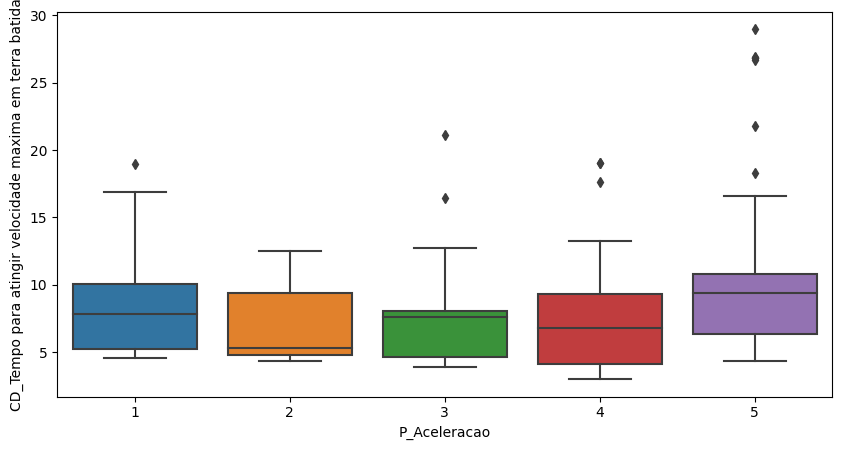

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=base_dados, x='P_Aceleracao', y='CD_Tempo para atingir velocidade maxima em terra batida')

<Axes: xlabel='P_Aceleracao', ylabel='CD_Tempo para atingir velocidade maxima em asfalto'>

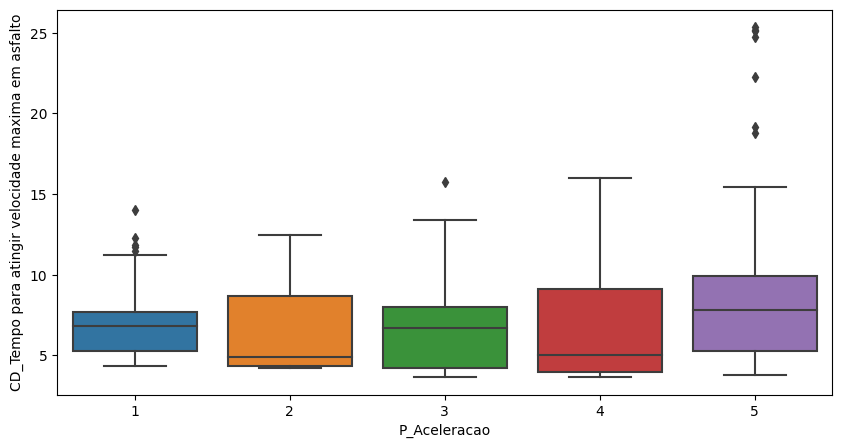

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=base_dados, x='P_Aceleracao', y='CD_Tempo para atingir velocidade maxima em asfalto')

<Axes: xlabel='P_Aceleracao', ylabel='Massa Total'>

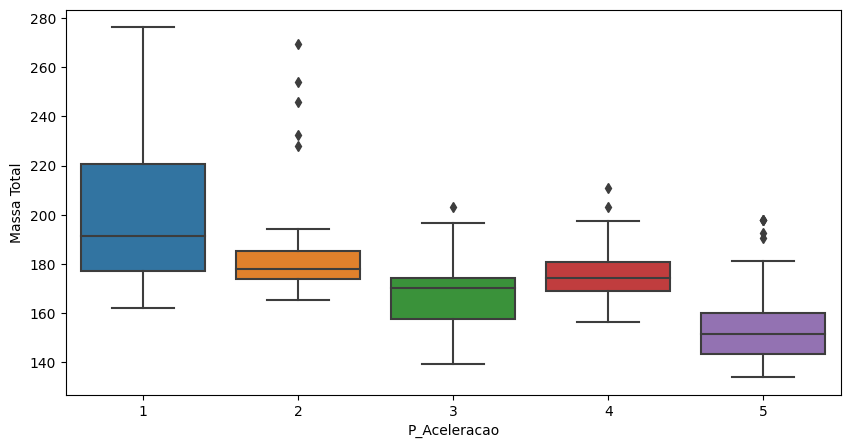

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=base_dados, x='P_Aceleracao', y='Massa Total')

In [ ]:
base_dados# Calcule os quartis e o intervalo interquartil (IQR)
Q1 = base_dados[base_dados['P_Aceleracao'] == 5]['CD_Tempo para atingir velocidade maxima em terra batida'].quantile(0.25)
Q3 = base_dados[base_dados['P_Aceleracao'] == 5]['CD_Tempo para atingir velocidade maxima em terra batida'].quantile(0.75)
IQR = Q3 - Q1

# Calcule os limites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Selecione os índices dos outliers para P_Aceleracao igual a 5
outliers_index = base_dados[(base_dados['P_Aceleracao'] == 5) &
                            ((base_dados['CD_Tempo para atingir velocidade maxima em terra batida'] < lower_bound) |
                             (base_dados['CD_Tempo para atingir velocidade maxima em terra batida'] > upper_bound))].index

# Remova os dados considerados outliers para P_Aceleracao igual a 5
base_dados.drop(outliers_index, inplace=True)

# Calcule os quartis e o intervalo interquartil (IQR)
Q1 = base_dados[base_dados['P_Aceleracao'] == 5]['CD_Tempo para atingir velocidade maxima em asfalto'].quantile(0.25)
Q3 = base_dados[base_dados['P_Aceleracao'] == 5]['CD_Tempo para atingir velocidade maxima em asfalto'].quantile(0.75)
IQR = Q3 - Q1

# Calcule os limites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Selecione os índices dos outliers para P_Aceleracao igual a 5
outliers_index = base_dados[(base_dados['P_Aceleracao'] == 5) &
                            ((base_dados['CD_Tempo para atingir velocidade maxima em asfalto'] < lower_bound) |
                             (base_dados['CD_Tempo para atingir velocidade maxima em asfalto'] > upper_bound))].index

# Remova os dados considerados outliers para P_Aceleracao igual a 5
base_dados.drop(outliers_index, inplace=True)


<ipython-input-19-cc147cb1d5a7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_dados.drop(outliers_index, inplace=True)
<ipython-input-19-cc147cb1d5a7>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_dados.drop(outliers_index, inplace=True)


<Axes: xlabel='P_Aceleracao', ylabel='CD_Tempo para atingir velocidade maxima em terra batida'>

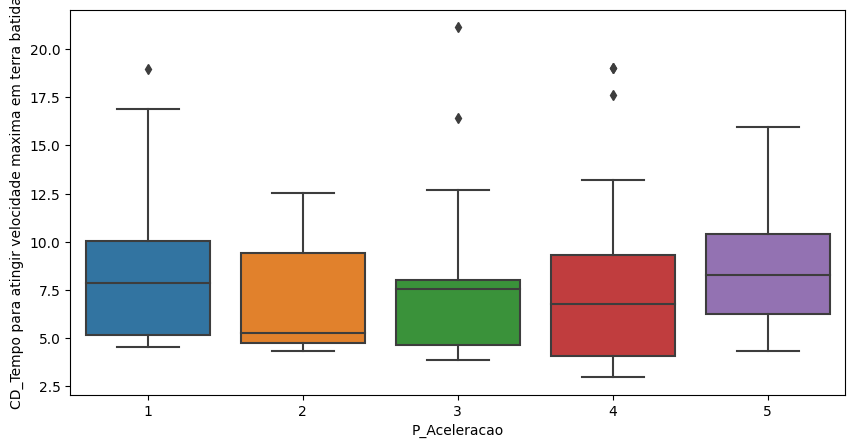

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=base_dados, x='P_Aceleracao', y='CD_Tempo para atingir velocidade maxima em terra batida')

<Axes: xlabel='P_Aceleracao', ylabel='CD_Tempo para atingir velocidade maxima em asfalto'>

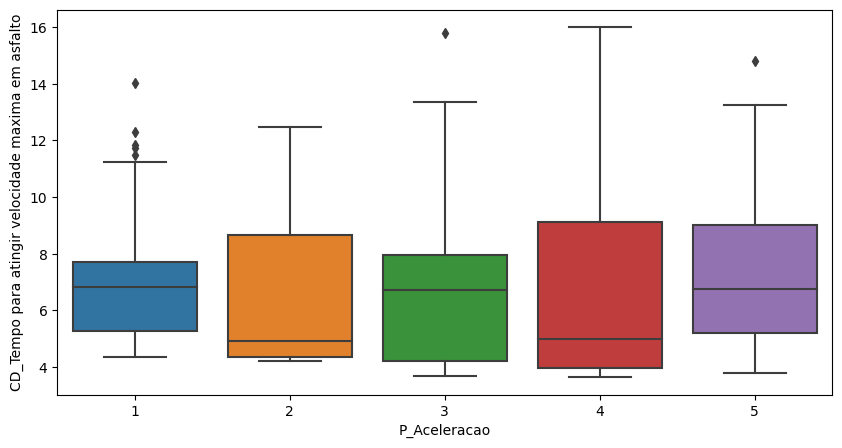

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=base_dados, x='P_Aceleracao', y='CD_Tempo para atingir velocidade maxima em asfalto')

In [ ]:
base_dados

,CD_Velocidade maxima de 0 a 100 metros em asfalto,CD_Velocidade maxima de 0 a 100 metros em terra batida,CD_Tempo para atingir velocidade maxima em asfalto,CD_Tempo para atingir velocidade maxima em terra batida,P_Aceleracao,Massa Total,Velocidade asfalto (m/s),Velocidade terra (m/s),Estimativa Tempo Asfalto,Estimativa Tempo Terra
1,53.401821,47.982676,5.691769,10.846115,1,162.101118,14.833839,13.328521,2.022403,2.250812
2,51.888566,51.800628,6.321324,4.606555,1,165.071406,14.413491,14.389063,2.081383,2.084917
4,46.084792,42.528714,12.293491,4.819045,1,186.749610,12.801331,11.813532,2.343506,2.539461
6,60.334349,50.133841,6.187652,5.642302,1,218.792884,16.759541,13.926067,1.790025,2.154234
7,48.537304,46.266223,4.761306,5.281698,1,175.702163,13.482584,12.851729,2.225093,2.334316
...,...,...,...,...,...,...,...,...,...,...
981,51.451784,49.068608,10.276973,10.698115,5,145.543182,14.292162,13.630169,2.099053,2.201000
982,57.938188,53.234547,5.192307,6.270298,5,174.484435,16.093941,14.787374,1.864056,2.028758
988,57.962728,50.787294,3.975294,4.374458,5,158.543692,16.100758,14.107582,1.863266,2.126516
992,51.095272,50.064866,10.926828,10.383670,5,158.762208,14.193131,13.906907,2.113698,2.157201


<Axes: xlabel='P_Aceleracao', ylabel='CD_Velocidade maxima de 0 a 100 metros em asfalto '>

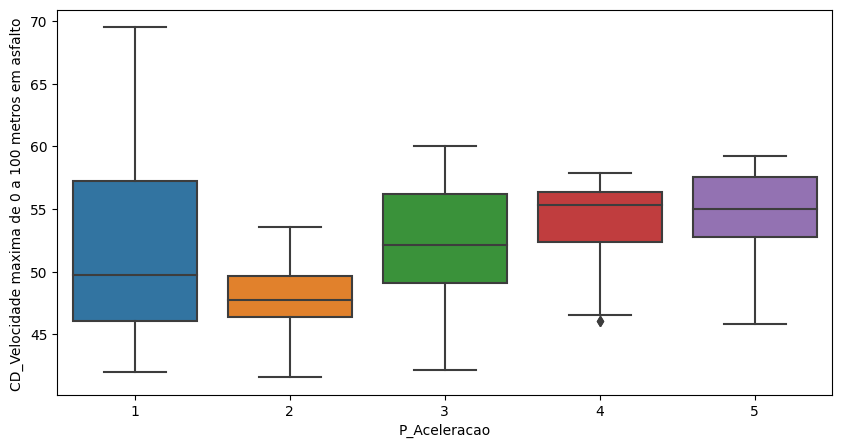

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=base_dados, x='P_Aceleracao', y='CD_Velocidade maxima de 0 a 100 metros em asfalto ')

In [ ]:
# Calcule os quartis e o intervalo interquartil (IQR)
Q1 = base_dados[base_dados['P_Aceleracao'] == 1]['CD_Velocidade maxima de 0 a 100 metros em asfalto '].quantile(0.25)
Q3 = base_dados[base_dados['P_Aceleracao'] == 1]['CD_Velocidade maxima de 0 a 100 metros em asfalto '].quantile(0.75)
IQR = Q3 - Q1

# Calcule os limites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Selecione os índices dos outliers para P_Aceleracao igual a 5
outliers_index = base_dados[(base_dados['P_Aceleracao'] == 1) &
                            ((base_dados['CD_Velocidade maxima de 0 a 100 metros em asfalto '] < lower_bound) |
                             (base_dados['CD_Velocidade maxima de 0 a 100 metros em asfalto '] > upper_bound))].index

# Remova os dados considerados outliers para P_Aceleracao igual a 5
base_dados.drop(outliers_index, inplace=True)


<ipython-input-24-e1cdba9b42c0>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_dados.drop(outliers_index, inplace=True)


<Axes: xlabel='P_Aceleracao', ylabel='CD_Velocidade maxima de 0 a 100 metros em asfalto '>

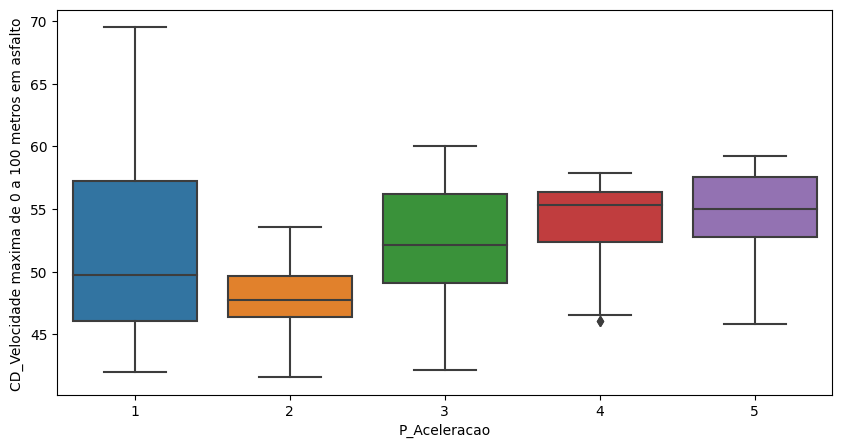

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=base_dados, x='P_Aceleracao', y='CD_Velocidade maxima de 0 a 100 metros em asfalto ')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train = np.array(base_dados.iloc[:, np.r_[0:4, 5]])
y_train = np.array(base_dados['P_Aceleracao'])

#x_train
#y_train

x_train, x_val,y_train, y_val = train_test_split(x_train,y_train,train_size=0.6,random_state=30)

modelo_rf = RandomForestClassifier(n_estimators=200, max_depth=14, random_state=30)  # Ajuste os parâmetros conforme necessário

modelo_rf.fit(x_train, y_train)

predicoes = modelo_rf.predict(x_val)

acuracia = accuracy_score(y_val, predicoes)
print(f'Acurácia do modelo de Random Forest: {acuracia:.2f}')


Acurácia do modelo de Random Forest: 0.78


In [ ]:
import numpy as np

x_novos = np.array([48,42.32,14,16,188.9])
x_novos = x_novos.reshape(1, -1)

previsoes_novos_dados = modelo_rf.predict(x_novos)

print(previsoes_novos_dados)

[1]


In [ ]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295 entries, 1 to 995
Data columns (total 10 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   CD_Velocidade maxima de 0 a 100 metros em asfalto        295 non-null    float64
 1   CD_Velocidade maxima de 0 a 100 metros em terra batida   295 non-null    float64
 2   CD_Tempo para atingir velocidade maxima em asfalto       295 non-null    float64
 3   CD_Tempo para atingir velocidade maxima em terra batida  295 non-null    float64
 4   P_Aceleracao                                             295 non-null    int64  
 5   Massa Total                                              295 non-null    float64
 6   Velocidade asfalto (m/s)                                 295 non-null    float64
 7   Velocidade terra (m/s)                                   295 non-null    float64
 8   Estimativa Tempo Asfalto      

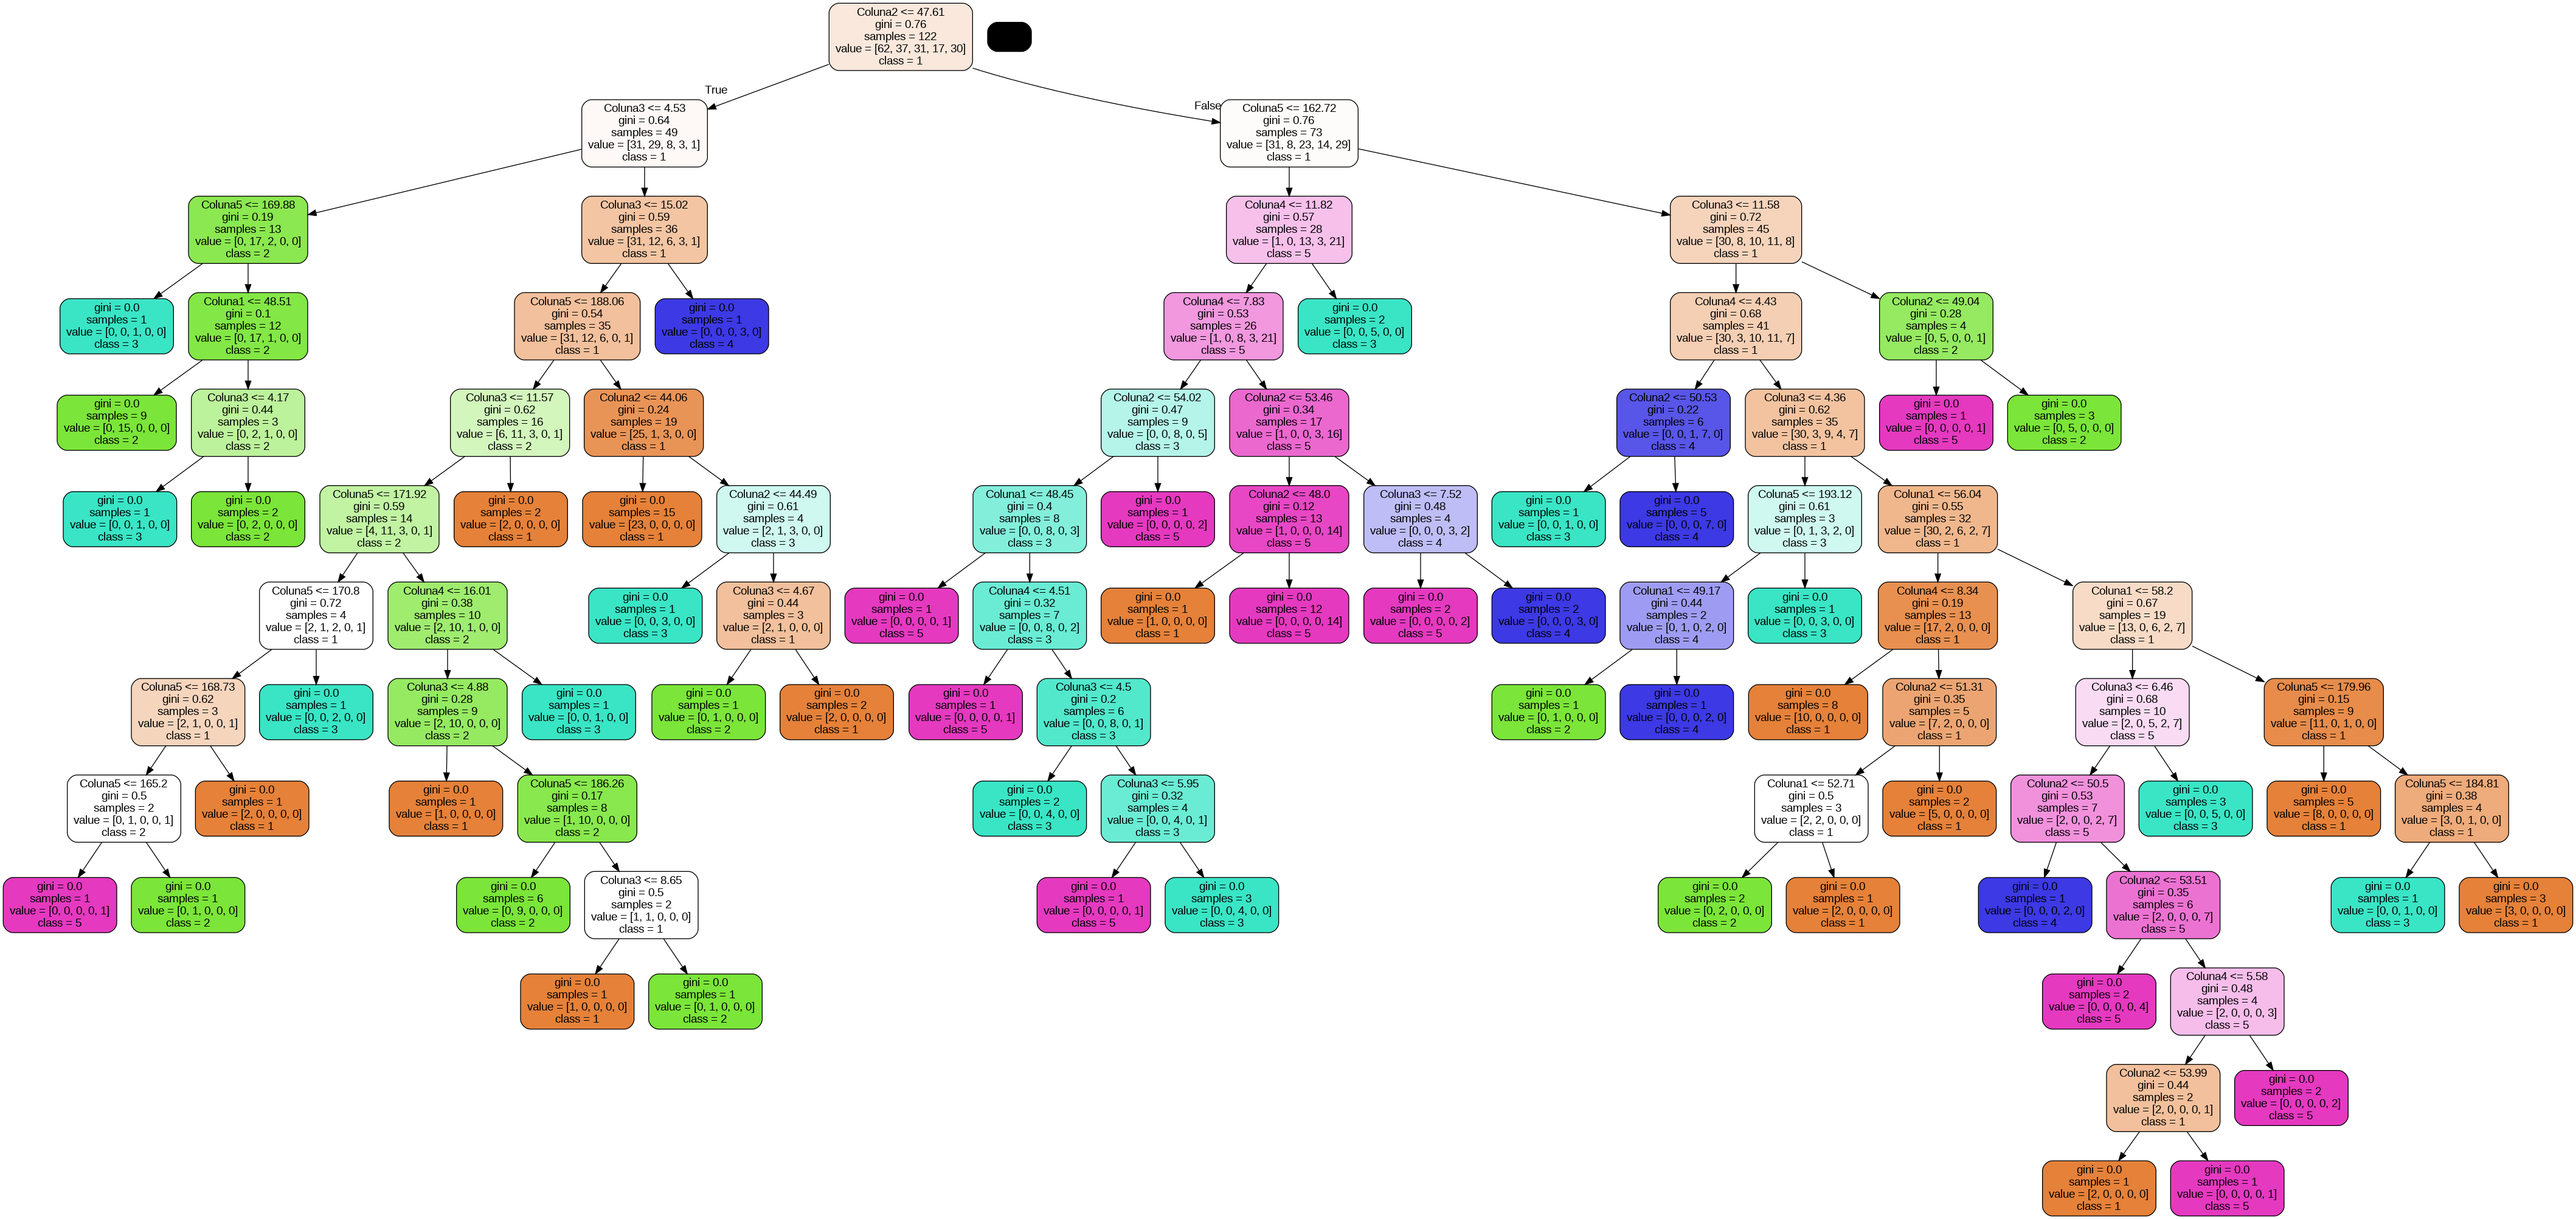

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

# Substitua o número do índice (0 neste caso) pelo número da árvore que deseja visualizar
estimator = modelo_rf.estimators_[0]

# Exporte a árvore para um arquivo .dot
export_graphviz(estimator, out_file='tree.dot',
                feature_names=['Coluna1', 'Coluna2', 'Coluna3', 'Coluna4', 'Coluna5'],  # Substitua pelos nomes das suas colunas
                class_names=['1', '2', '3', '4', '5'],  # Substitua pelas classes do seu modelo
                rounded=True, proportion=False,
                precision=2, filled=True)

# Converta o arquivo .dot para um formato legível
graph = pydotplus.graph_from_dot_file('tree.dot')

# Mostre a árvore
Image(graph.create_png())
